In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#add new column
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df["target"].unique()

array([0, 1, 2])

In [7]:
df.groupby("target").count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [8]:
df["flower_name"] = df["target"].apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
setosa = df.iloc[:50]
versicolor = df.iloc[50:100]
virginica = df.iloc[100:]

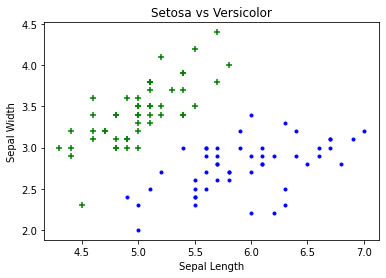

In [10]:
x0 = setosa['sepal length (cm)']
y0 = setosa['sepal width (cm)']
x1 = versicolor['sepal length (cm)']
y1 = versicolor['sepal width (cm)']

plt.title('Setosa vs Versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(x0, y0,color="green",marker='+')
plt.scatter(x1, y1,color="blue",marker='.');

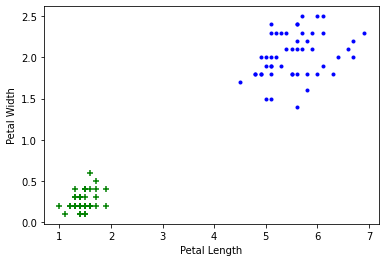

In [11]:
x0 = setosa['petal length (cm)']
y0 = setosa['petal width (cm)']
x1 = virginica['petal length (cm)']
y1 = virginica['petal width (cm)']

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(x0, y0 ,color="green",marker='+')
plt.scatter(x1, y1,color="blue",marker='.');

In [12]:
#x is independent
X = df.drop(["target", "flower_name"], axis="columns")
#y is dependent
y = df.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
model.predict([[4.8,3.0, 1.5, 0.3]])

array([0])

In [16]:
# [0] = Setosa

In [17]:
y_pred = model.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [19]:
X_test.count()

print("Test data set is {} means that {} predicted as Setosa {} Versicolor as {} Virginica".format(X_test.count(),cm[0,0],cm[1,1],cm[2,2]))

Test data set is sepal length (cm)    30
sepal width (cm)     30
petal length (cm)    30
petal width (cm)     30
dtype: int64 means that 11 predicted as Setosa 13 Versicolor as 6 Virginica


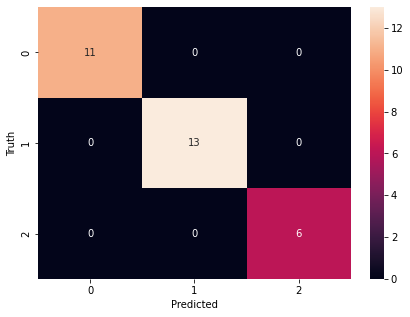

In [20]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

